# Two beam power loss

## Pillbox resonant cavity

The test case for the two beam power loss is a pillbox resonant cavity. The fundamental mode is the $TM_{010}$ with a resoance frequency of $a=0.383\lambda$



<img src="https://gitlab.com/francescogio/two-beam-power-loss/raw/master/pillbox_cavity.png" alt="cavity"
	title="Pillbox cavity" width="400" height="200" />
    
For a pillbox cavity the Q is given by:  
    
$$Q= \frac{a}{\delta}(1+\frac{a}{h})^{-1}$$

with $\delta=\sqrt{\frac{2}{2\pi f\sigma\mu}}$



In [17]:
import numpy as np
from __future__ import print_function, division

c = 3e8
Q = 1e4
f = 1e9
#h = 10e-2
sigma = 1e4 
mu = 1

Lambda = c / f
delta = np.sqrt(2 / (2 * np.pi * f * sigma * mu))

a = 0.383 * Lambda
h = a / (a / (delta * Q) - 1)
#Q = a / delta * (1 + a / h)**(-1)

print ('Lambda: %.3fm' %Lambda)
print ('delta: %.3fum' %(delta*1e6))
print ('a: %.3fm' %a)
print ('h: %.7fm' %h)
print ('Q: %.2fe5' %(Q/1e5))


Lambda: 0.300m
delta: 0.178um
a: 0.115m
h: 0.0018123m
Q: 0.10e5


The aim is to model the cavity to have just one resonating mode with a Q factor that covers at least 3 main lines of the power spectrum.
Just looking at the equations this is possible with very low $(\sigma \propto 10^3\frac{S}{m})$. Low value of $\sigma$ means that the wake field decays fast not allowing two bunches of the same beam or even two bunches of two different beam to crosstalk that is one of the case of our interest.
High $\sigma$, low Q and a $f_r$ around 1GHz (needed to have just one mode in the cavity) are quite demanding specs, indeed the Q and the $\sigma$ required lead to a very small value of the cavity length $h$.
This modelling issue can be solved considering that the cavity has to be linked to a beam pipe, therefore even having an higher value of $h$ does not lead to very high values of Q because some of the power flows into the beam pipe lowering down the Q value.

Starting from the parameter previously computed (a= 10cm and h = 0.18cm) a good resonating mode around 1GHz is obtained with a= 11.6cm and h= 1cm if a beam pipe with radius r = 4cm is added. The cavity is then coated with a lossy material that exceeds just the cavity size of 0.5cm in all the directions with $ \sigma=10^4 \frac{S}{m}$.

<img src="https://gitlab.com/francescogio/two-beam-power-loss/raw/master/cavity_model.png" alt="mode_chart"
	title="Pillbox mode chart" width="400" height="200" />

Is important to observe that the value of h that is chosen does not allow any high order mode in the cavity in the range 0-2GHz

<img src="https://gitlab.com/francescogio/two-beam-power-loss/raw/master/mode_chart_pillbox.png" alt="mode_chart"
	title="Pillbox mode chart" width="400" height="200" />
    



## Mesh checking

Before simulating one full bunch beam, several simulations are done varying the mesh in order to find the minimum number of cells that gives a solid result.

In [ ]:
%pylab notebook

<IPython.core.display.Javascript object>


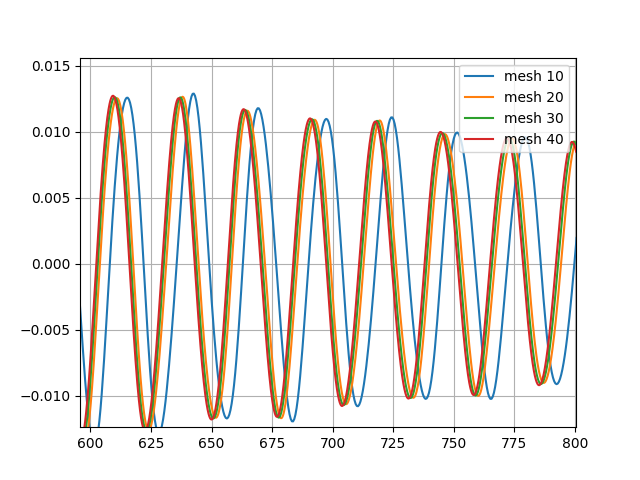

In [35]:
import pandas as pd
import numpy as np
import pylab as pl

mesh_10 = np.genfromtxt('wake_mesh_10cpw.txt', skip_header=5)
mesh_20 = np.genfromtxt('wake_mesh_20cpw.txt', skip_header=5)
mesh_30 = np.genfromtxt('wake_mesh_30cpw.txt', skip_header=5)
mesh_40 = np.genfromtxt('wake_mesh_40cpw.txt', skip_header=5)
mesh_20s = np.genfromtxt('wake_mesh_20cpw_simmetry.txt', skip_header=5)

mesh_10 = pd.DataFrame(mesh_10)
mesh_20 = pd.DataFrame(mesh_20)
mesh_30 = pd.DataFrame(mesh_30)
mesh_40 = pd.DataFrame(mesh_40)
mesh_20s = pd.DataFrame(mesh_20s)

mesh_10.columns = ['t', 'W']
mesh_20.columns = ['t', 'W']
mesh_30.columns = ['t', 'W']
mesh_40.columns = ['t', 'W']
mesh_20s.columns = ['t', 'W']

pl.figure()
pl.plot(mesh_10['t'], mesh_10['W'], label = 'mesh 10')
pl.plot(mesh_20['t'], mesh_20['W'], label = 'mesh 20')
# pl.plot(mesh_20s['t'], mesh_20s['W'], label = 'mesh 20s')
pl.plot(mesh_30['t'], mesh_30['W'], label = 'mesh 30')
pl.plot(mesh_40['t'], mesh_40['W'], label = 'mesh 40')
pl.grid(True)
pl.legend()
pl.show()

Looking at the plot of the wakefields it seems that 20 cells per wavelength is the best comprimise between the wakefield convergence and the computing time.

In [45]:
x_mode_chart = Lambda / (2 * a)
y_mode_chart = h / (2 * a)
y_mode_chart

0.028423515661247973

In [17]:
3e8/3e9

0.1

In [9]:
5/c

1.6666666666666667e-08

In [10]:
1.6e-8/25e-9

0.64